In [ ]:
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn

In [ ]:
transformer = transforms.Compose([
    transforms.Resize((24,24)),
    transforms.ToTensor(),
    transforms.Normalize(0,1)
])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)
os.getcwd()

cuda


'/content'

In [ ]:
train = MNIST(root='./data', transform=transformer, download=True)

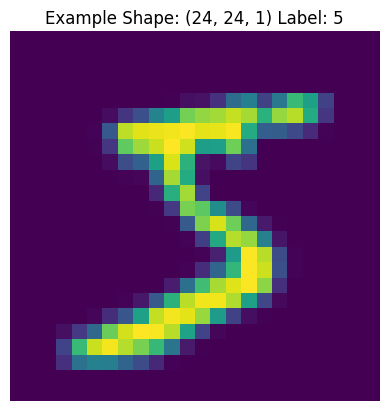

Train size:  1000


In [ ]:
image, label = train[0]

image_np = image.numpy()

image_np = image_np.transpose((1, 2, 0))
shape = image_np.shape
plt.imshow(image_np)
plt.title(f'Example Shape: {shape} Label: {label}')
plt.axis('off')
plt.show()

train = torch.utils.data.Subset(train, range(1000))
print("Train size: ",len(train))

In [ ]:
##For Mnist
class Discriminator(nn.Module):
    def __init__(self, input_channels):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 128, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1)
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(128 * 6 * 6, 1)
        self.relu_leaky = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu_leaky(self.conv1(x))
        x = self.relu_leaky(self.conv2(x))
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.dense = nn.Linear(latent_dim, 128 * 6 * 6)
        self.convT1 = nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1)
        self.convT2 = nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1)
        self.convT3 = nn.Conv2d(128, 1, kernel_size=1, stride=1, padding=0)
        self.relu_leaky = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, latent):
        x = self.dense(latent)
        x = self.relu_leaky(x)
        x = x.view(-1, 128, 6, 6)
        x = self.relu_leaky(self.convT1(x))
        x = self.relu_leaky(self.convT2(x))
        x = self.sigmoid(self.convT3(x))
        return x

def loss_Diss(dis, real, generated):
    real_pred = dis(real).squeeze()
    fake_pred = dis(generated).squeeze()
    loss_real = F.binary_cross_entropy(real_pred, torch.ones_like(real_pred))
    loss_fake = F.binary_cross_entropy(fake_pred, torch.zeros_like(fake_pred))

    total_loss = loss_real + loss_fake

    return total_loss


def loss_Gen(dis, generated):
    pred = dis(generated).squeeze()
    # Generator wants the discriminator to think its images are real
    loss = F.binary_cross_entropy(pred, torch.ones_like(pred))

    return loss


In [ ]:
###### TRAINING PARAMETERS

latent_dim = 150
lr = 0.0001
beta = 0.5
epochs = 500
batch_size = 32

mu = 0
std = 1

generator = Generator(latent_dim=latent_dim).to(device)
discriminator = Discriminator(input_channels=1).to(device)

dataloader = DataLoader(train,batch_size=batch_size//2,shuffle=True)


In [ ]:
optimG = torch.optim.Adam(generator.parameters(),lr=lr,betas=(beta,0.999))
optimD = torch.optim.Adam(discriminator.parameters(),lr=lr,betas=(beta,0.999))

**Training Loop Starts**

In [ ]:
def get_latent_noise(batch_size,dim):
  return torch.randn(batch_size,dim).to(device)

Epoch [1/500], Discriminator Loss: 0.3744, Generator Loss: 1.6181


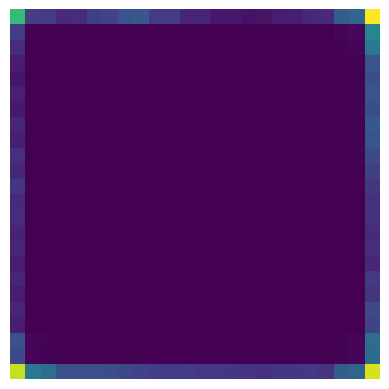

Epoch [6/500], Discriminator Loss: 0.0121, Generator Loss: 5.7157


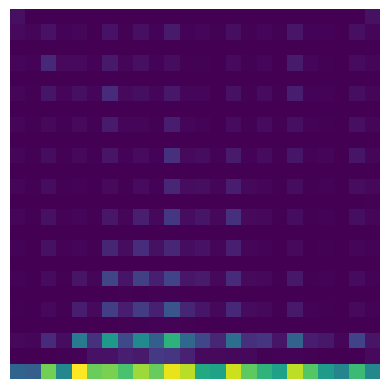

Epoch [11/500], Discriminator Loss: 1.1917, Generator Loss: 0.8488


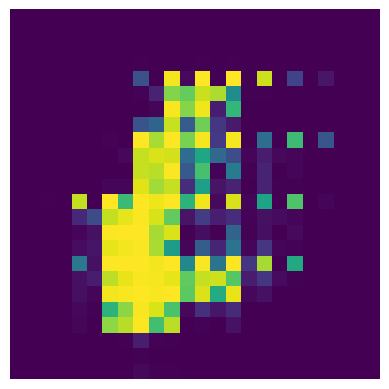

Epoch [16/500], Discriminator Loss: 1.5653, Generator Loss: 0.7108


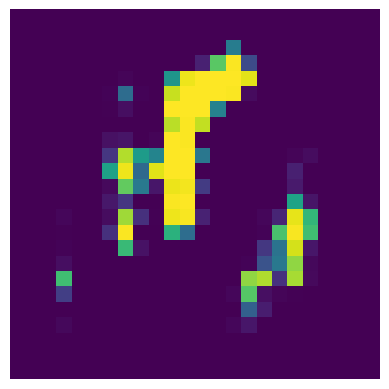

Epoch [21/500], Discriminator Loss: 1.3930, Generator Loss: 0.8575


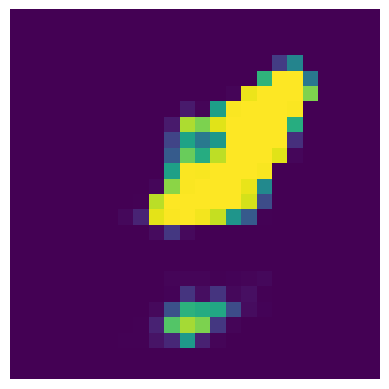

Epoch [26/500], Discriminator Loss: 1.2644, Generator Loss: 0.6703


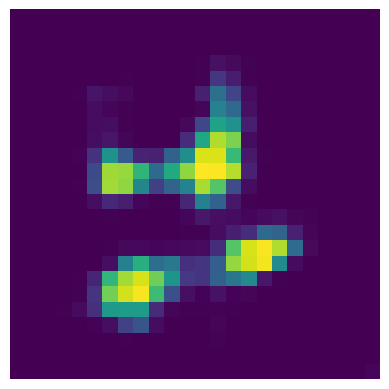

Epoch [31/500], Discriminator Loss: 1.2857, Generator Loss: 0.7149


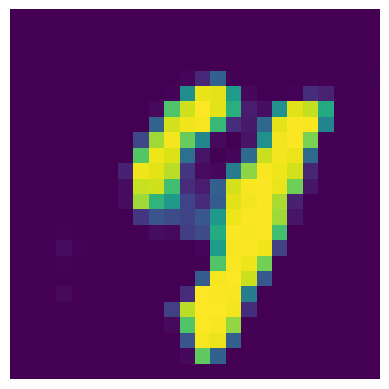

Epoch [36/500], Discriminator Loss: 1.3629, Generator Loss: 0.8040


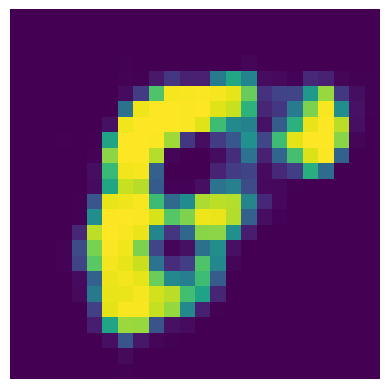

Epoch [41/500], Discriminator Loss: 1.1375, Generator Loss: 0.8041


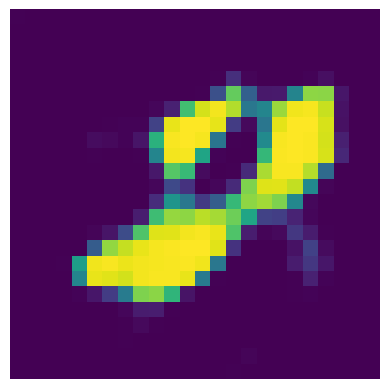

Epoch [46/500], Discriminator Loss: 1.1506, Generator Loss: 0.8625


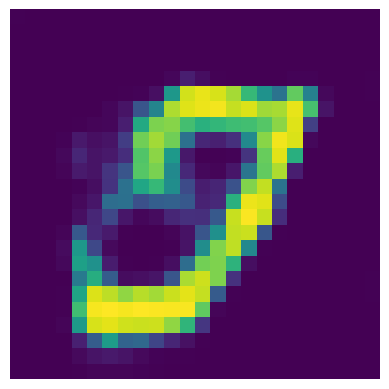

Epoch [51/500], Discriminator Loss: 1.1667, Generator Loss: 0.9093


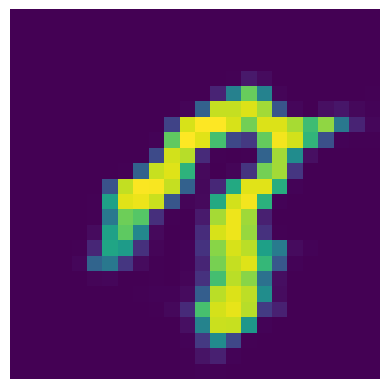

Epoch [56/500], Discriminator Loss: 1.0888, Generator Loss: 1.0140


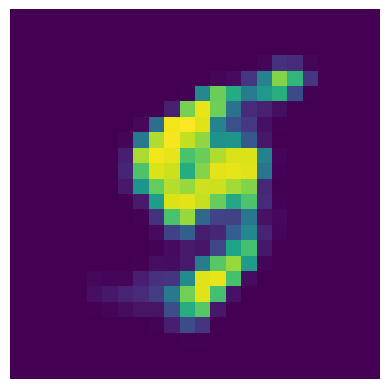

Epoch [61/500], Discriminator Loss: 1.0476, Generator Loss: 0.8439


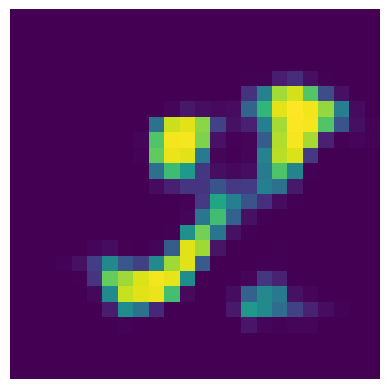

Epoch [66/500], Discriminator Loss: 0.9841, Generator Loss: 1.1477


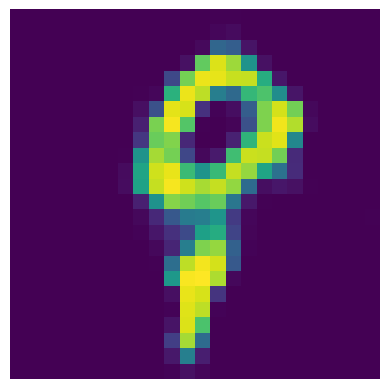

Epoch [71/500], Discriminator Loss: 1.2749, Generator Loss: 0.7678


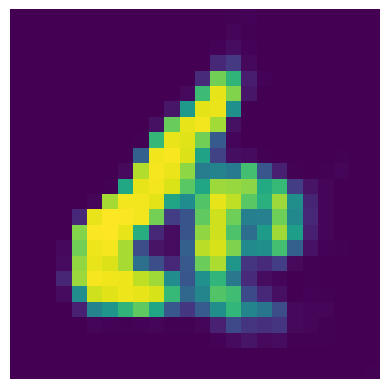

Epoch [76/500], Discriminator Loss: 1.3445, Generator Loss: 0.8476


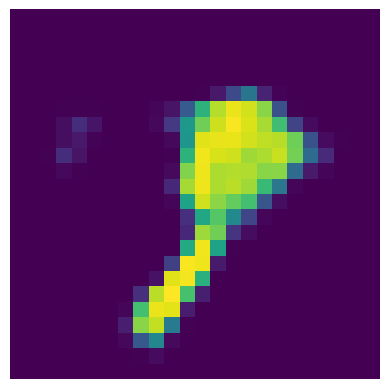

Epoch [81/500], Discriminator Loss: 1.1404, Generator Loss: 0.7557


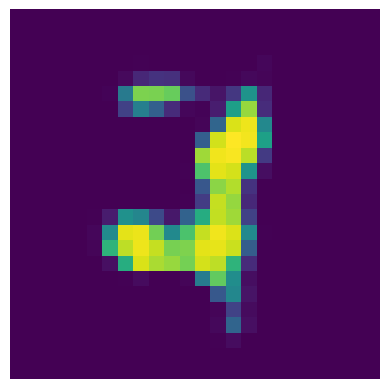

Epoch [86/500], Discriminator Loss: 1.5051, Generator Loss: 0.6428


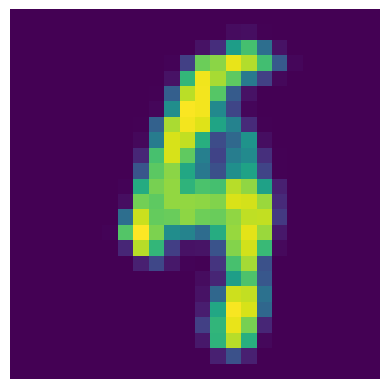

Epoch [91/500], Discriminator Loss: 1.1128, Generator Loss: 0.9887


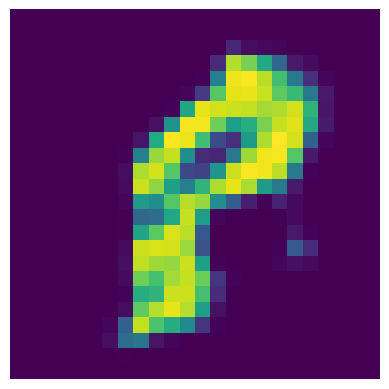

Epoch [96/500], Discriminator Loss: 1.2111, Generator Loss: 0.8990


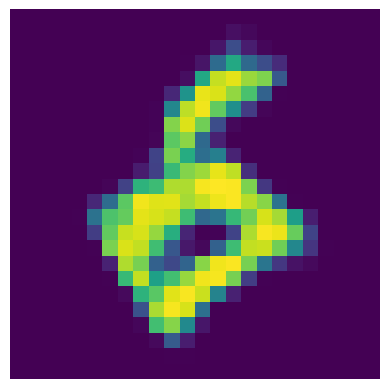

Epoch [101/500], Discriminator Loss: 1.2921, Generator Loss: 0.8117


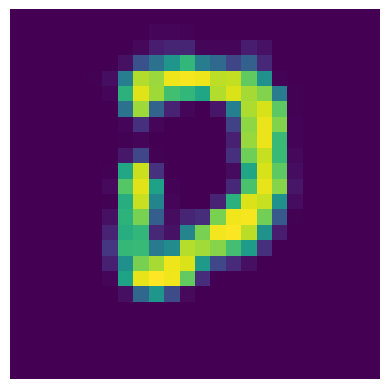

Epoch [106/500], Discriminator Loss: 1.3836, Generator Loss: 0.6952


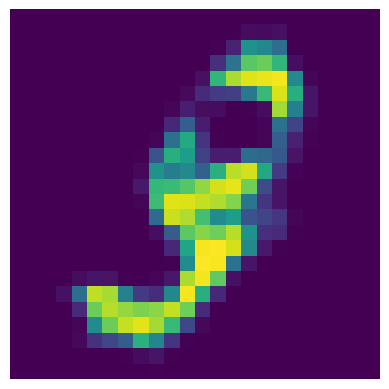

Epoch [111/500], Discriminator Loss: 1.2052, Generator Loss: 0.7759


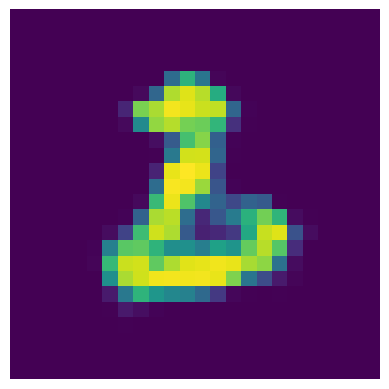

Epoch [116/500], Discriminator Loss: 1.2450, Generator Loss: 0.8417


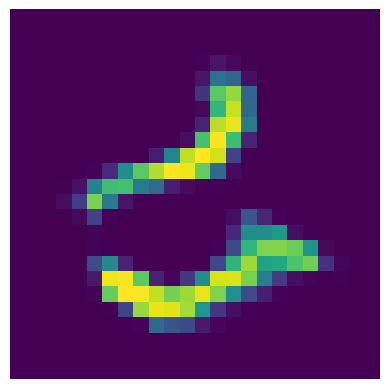

Epoch [121/500], Discriminator Loss: 1.3233, Generator Loss: 0.9260


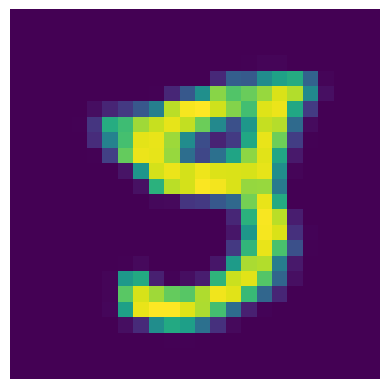

Epoch [126/500], Discriminator Loss: 1.3399, Generator Loss: 0.9395


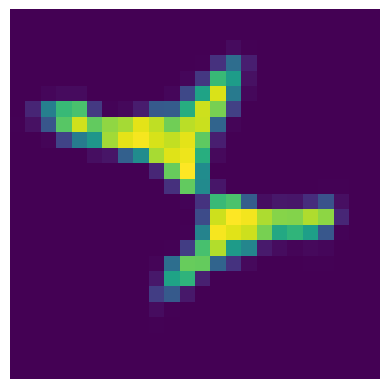

Epoch [131/500], Discriminator Loss: 1.2535, Generator Loss: 0.8065


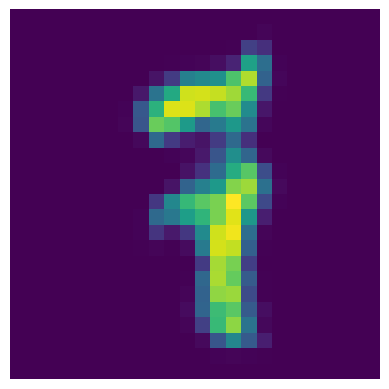

Epoch [136/500], Discriminator Loss: 1.3522, Generator Loss: 0.7431


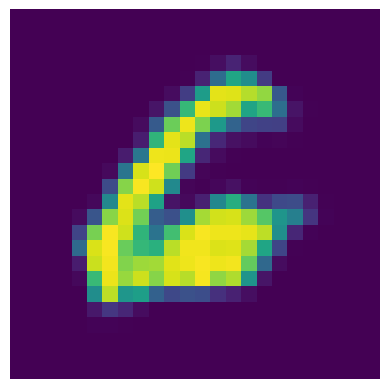

Epoch [141/500], Discriminator Loss: 1.2300, Generator Loss: 0.9015


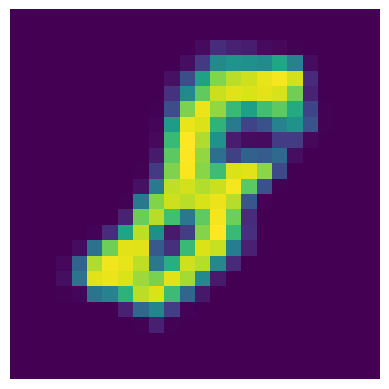

Epoch [146/500], Discriminator Loss: 1.0337, Generator Loss: 0.8272


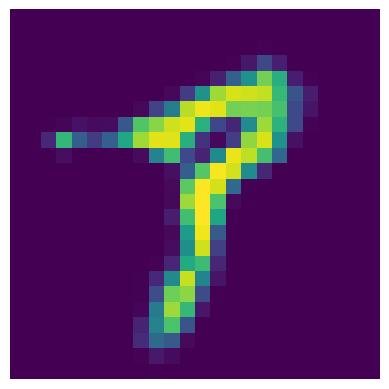

Epoch [151/500], Discriminator Loss: 1.2480, Generator Loss: 1.0655


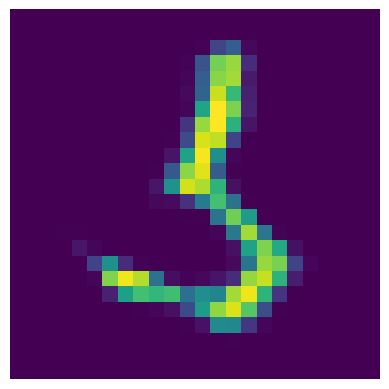

Epoch [156/500], Discriminator Loss: 1.3103, Generator Loss: 0.8645


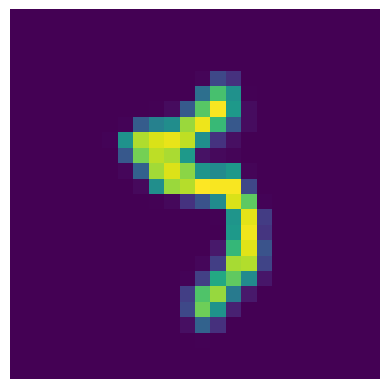

Epoch [161/500], Discriminator Loss: 1.2138, Generator Loss: 1.0039


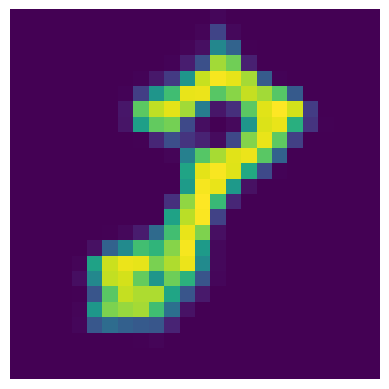

Epoch [166/500], Discriminator Loss: 1.2435, Generator Loss: 0.6854


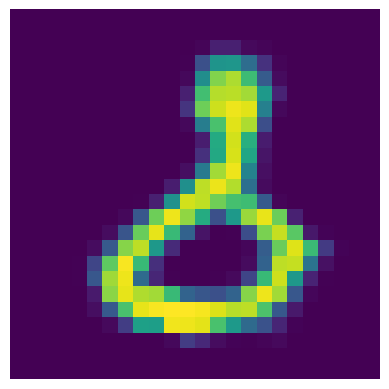

Epoch [171/500], Discriminator Loss: 1.4285, Generator Loss: 0.9330


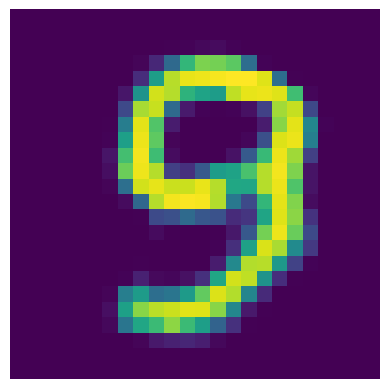

Epoch [176/500], Discriminator Loss: 1.3559, Generator Loss: 0.9592


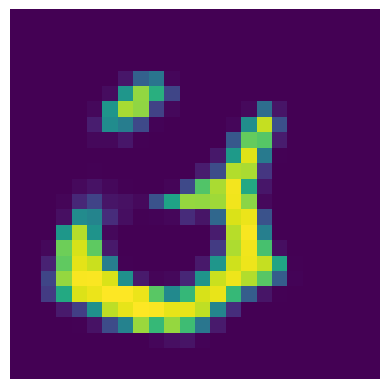

Epoch [181/500], Discriminator Loss: 1.1172, Generator Loss: 0.8173


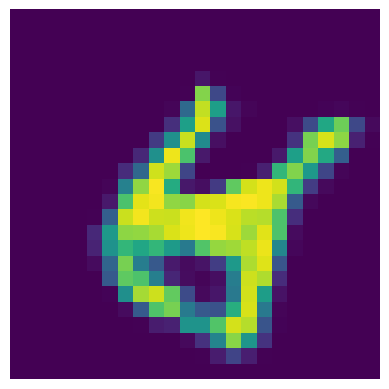

Epoch [186/500], Discriminator Loss: 1.2809, Generator Loss: 0.6341


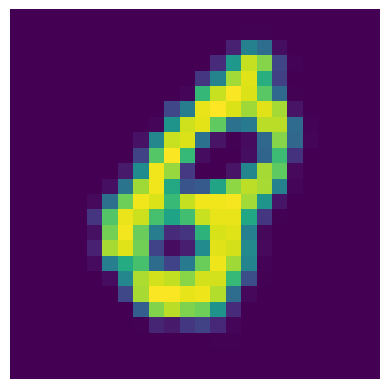

Epoch [191/500], Discriminator Loss: 1.2792, Generator Loss: 0.9779


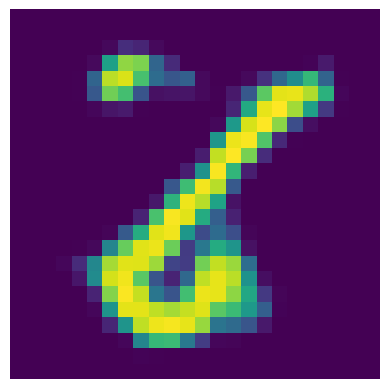

Epoch [196/500], Discriminator Loss: 1.2955, Generator Loss: 1.1745


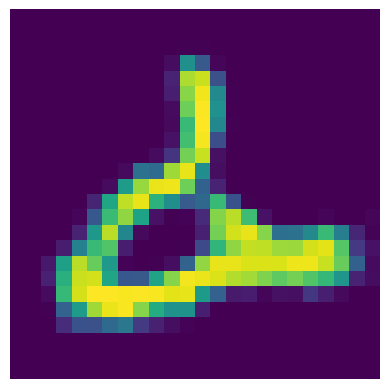

Epoch [201/500], Discriminator Loss: 1.0720, Generator Loss: 0.9680


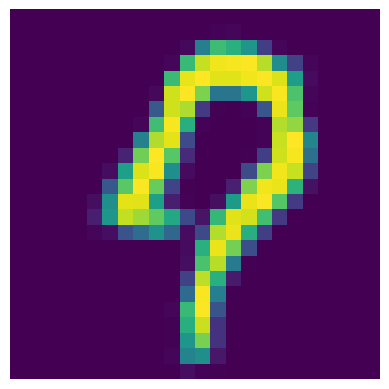

Epoch [206/500], Discriminator Loss: 1.1592, Generator Loss: 0.9368


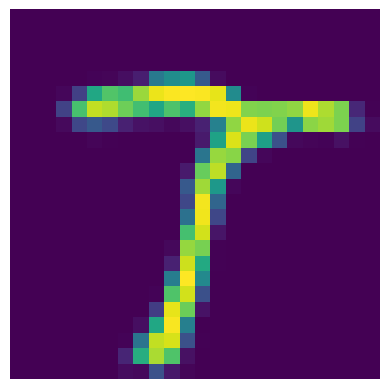

Epoch [211/500], Discriminator Loss: 1.2338, Generator Loss: 0.8443


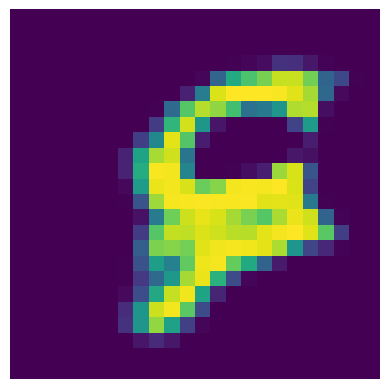

Epoch [216/500], Discriminator Loss: 1.0891, Generator Loss: 1.0511


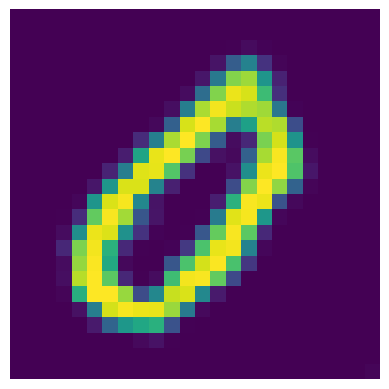

Epoch [221/500], Discriminator Loss: 1.2888, Generator Loss: 1.2403


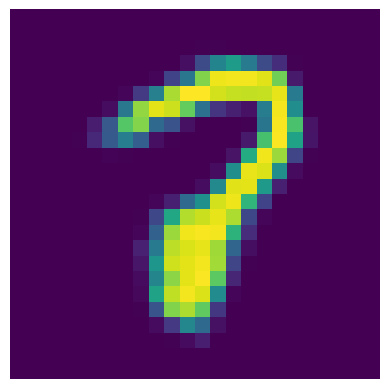

Epoch [226/500], Discriminator Loss: 1.2631, Generator Loss: 0.8453


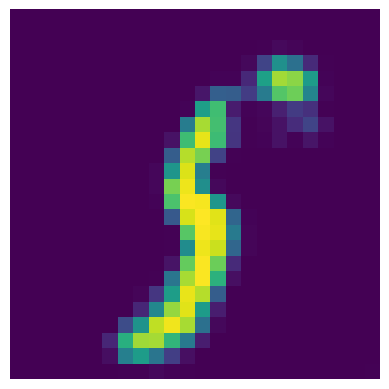

Epoch [231/500], Discriminator Loss: 1.2188, Generator Loss: 0.6418


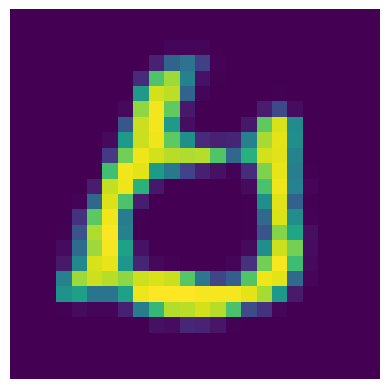

Epoch [236/500], Discriminator Loss: 1.0966, Generator Loss: 0.9142


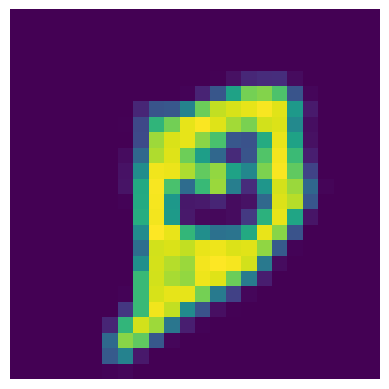

Epoch [241/500], Discriminator Loss: 1.1488, Generator Loss: 0.7575


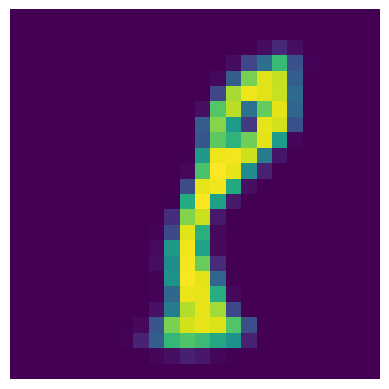

Epoch [246/500], Discriminator Loss: 1.2388, Generator Loss: 0.9649


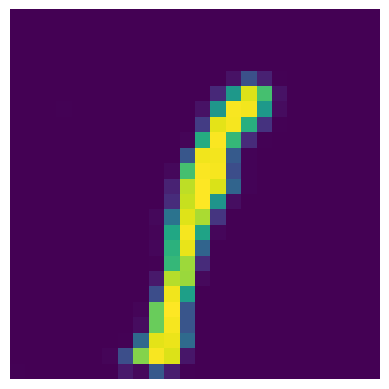

Epoch [251/500], Discriminator Loss: 1.2663, Generator Loss: 0.9581


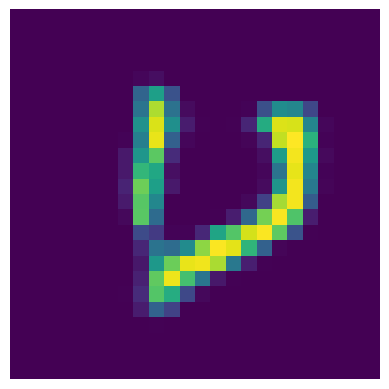

Epoch [256/500], Discriminator Loss: 1.0656, Generator Loss: 0.8940


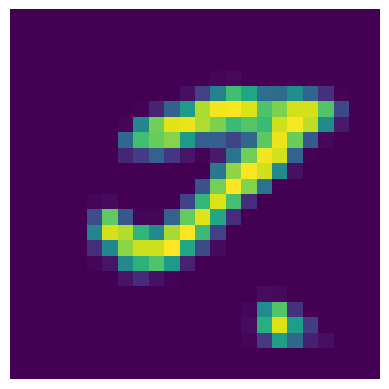

Epoch [261/500], Discriminator Loss: 1.2712, Generator Loss: 0.8638


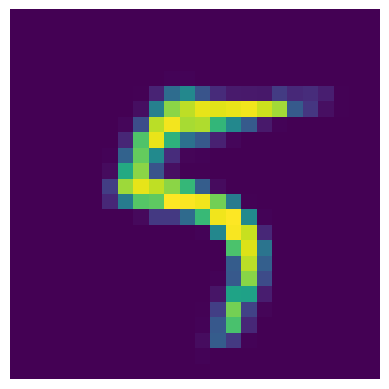

Epoch [266/500], Discriminator Loss: 1.1365, Generator Loss: 1.0430


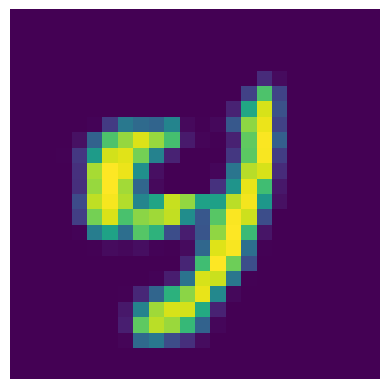

Epoch [271/500], Discriminator Loss: 1.3479, Generator Loss: 0.9864


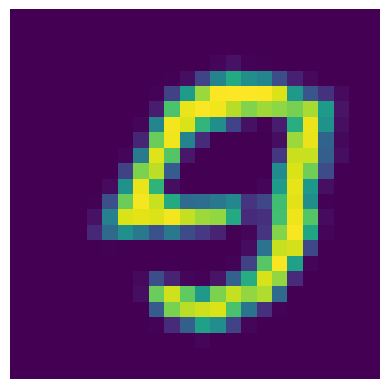

Epoch [276/500], Discriminator Loss: 1.2729, Generator Loss: 0.8641


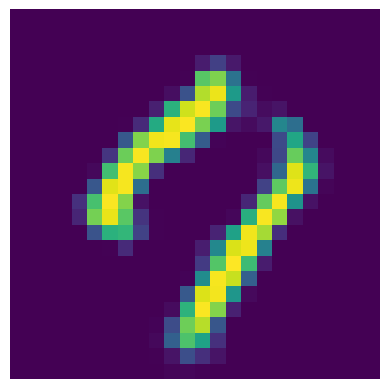

Epoch [281/500], Discriminator Loss: 1.1327, Generator Loss: 0.8168


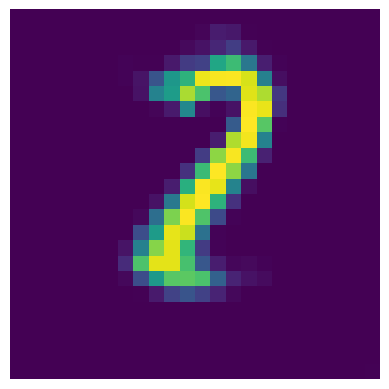

Epoch [286/500], Discriminator Loss: 1.3242, Generator Loss: 0.7955


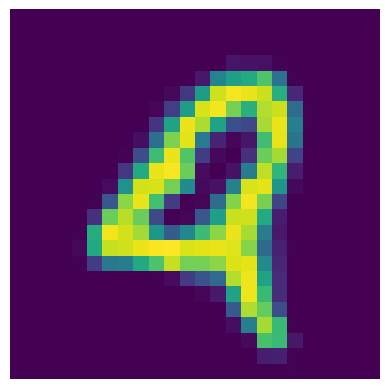

Epoch [291/500], Discriminator Loss: 1.3434, Generator Loss: 1.0251


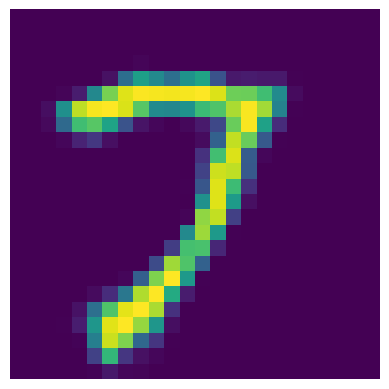

Epoch [296/500], Discriminator Loss: 1.1742, Generator Loss: 1.0236


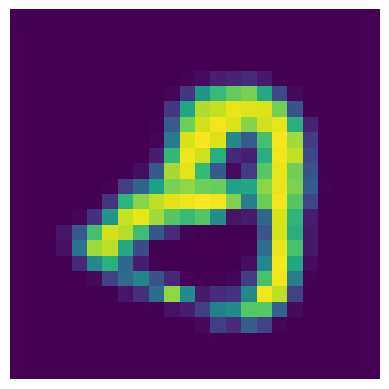

Epoch [301/500], Discriminator Loss: 1.2189, Generator Loss: 0.7343


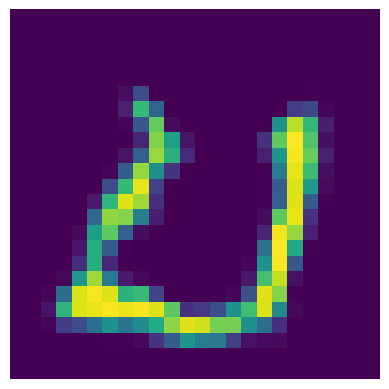

Epoch [306/500], Discriminator Loss: 1.0570, Generator Loss: 1.0871


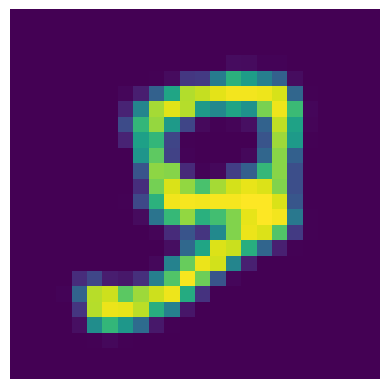

Epoch [311/500], Discriminator Loss: 1.4264, Generator Loss: 0.9196


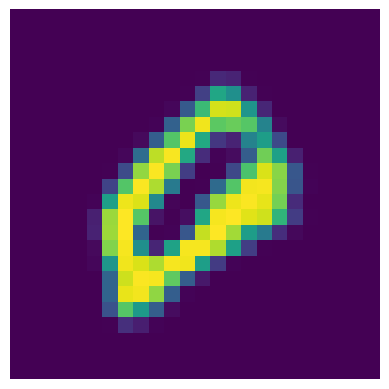

Epoch [316/500], Discriminator Loss: 1.3273, Generator Loss: 0.8492


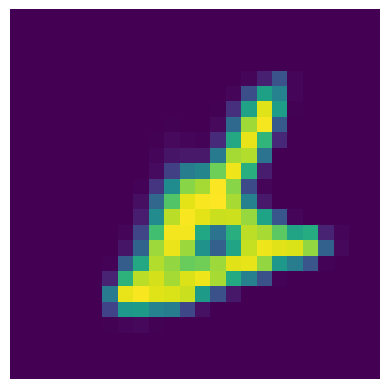

Epoch [321/500], Discriminator Loss: 1.1983, Generator Loss: 0.8605


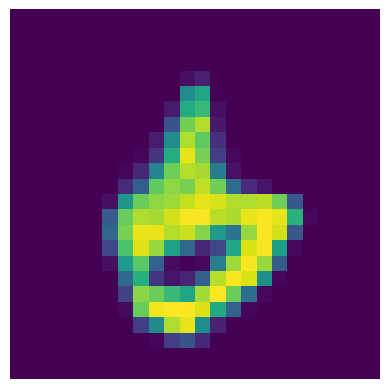

Epoch [326/500], Discriminator Loss: 1.1424, Generator Loss: 0.8322


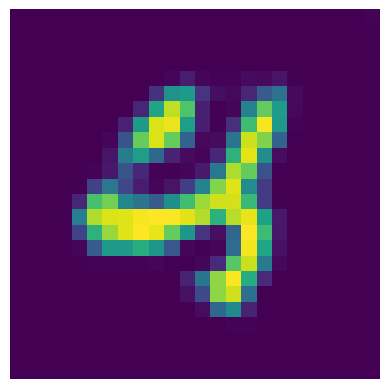

Epoch [331/500], Discriminator Loss: 1.0204, Generator Loss: 1.0014


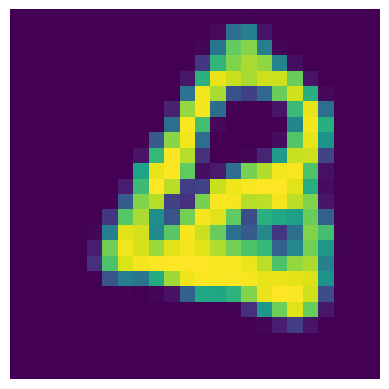

Epoch [336/500], Discriminator Loss: 1.1763, Generator Loss: 0.6311


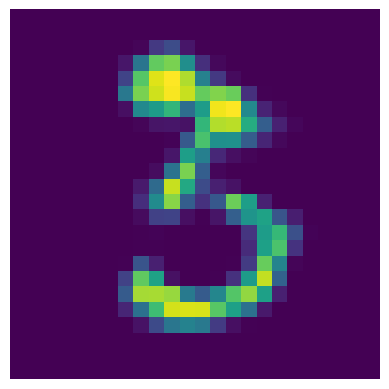

Epoch [341/500], Discriminator Loss: 1.2053, Generator Loss: 0.6912


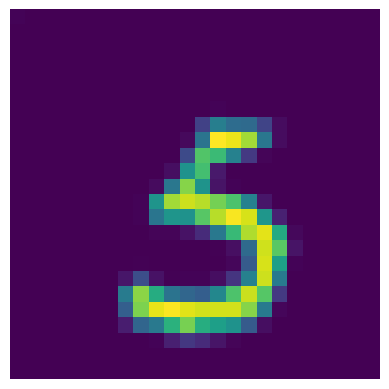

Epoch [346/500], Discriminator Loss: 1.2871, Generator Loss: 0.8594


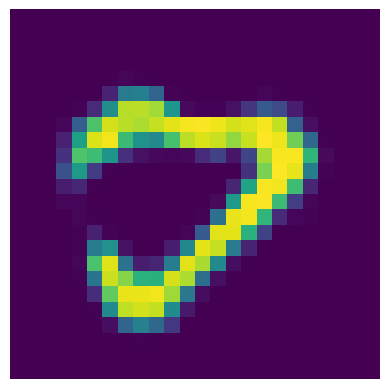

Epoch [351/500], Discriminator Loss: 1.4551, Generator Loss: 0.5917


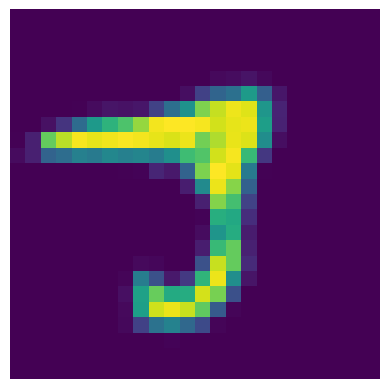

Epoch [356/500], Discriminator Loss: 1.1917, Generator Loss: 1.1274


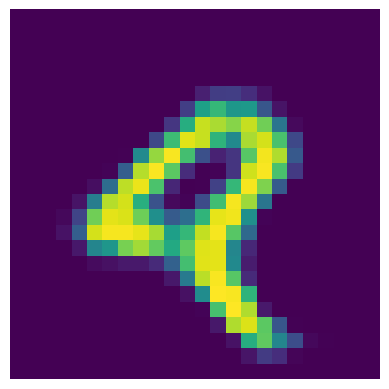

Epoch [361/500], Discriminator Loss: 1.4305, Generator Loss: 0.8728


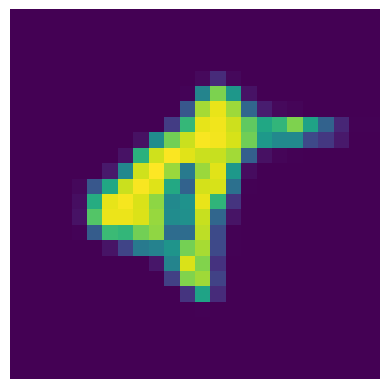

Epoch [366/500], Discriminator Loss: 1.1348, Generator Loss: 0.7828


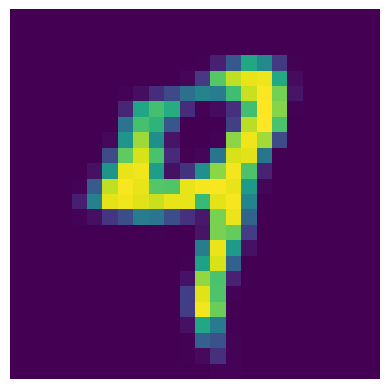

Epoch [371/500], Discriminator Loss: 1.2803, Generator Loss: 0.7754


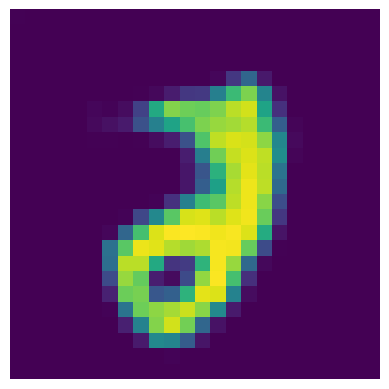

Epoch [376/500], Discriminator Loss: 1.3194, Generator Loss: 0.7657


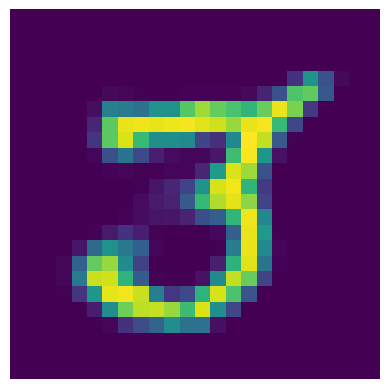

Epoch [381/500], Discriminator Loss: 1.2570, Generator Loss: 0.7301


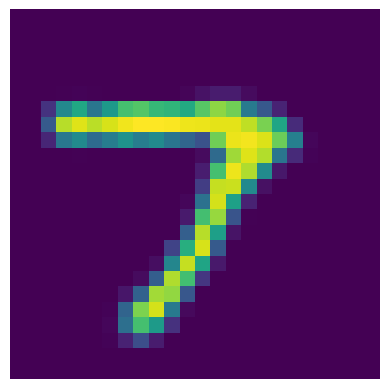

Epoch [386/500], Discriminator Loss: 1.3216, Generator Loss: 0.6767


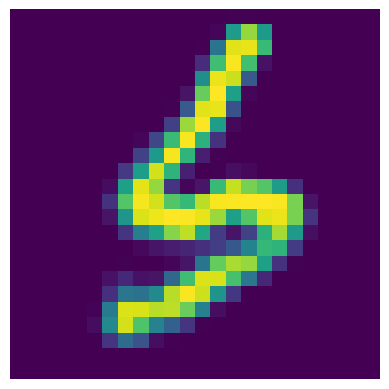

Epoch [391/500], Discriminator Loss: 1.2169, Generator Loss: 0.8124


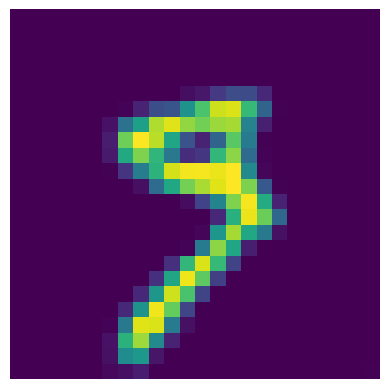

Epoch [396/500], Discriminator Loss: 1.2426, Generator Loss: 0.7864


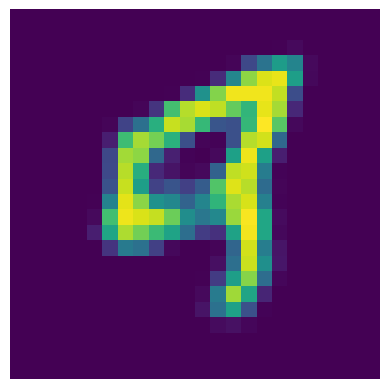

Epoch [401/500], Discriminator Loss: 1.1624, Generator Loss: 0.8635


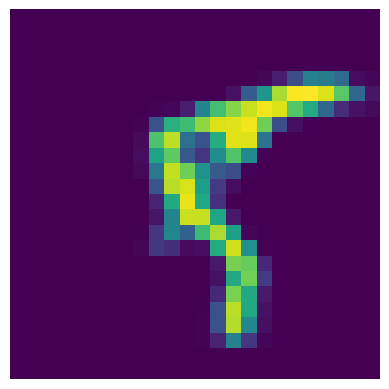

Epoch [406/500], Discriminator Loss: 1.1405, Generator Loss: 0.9272


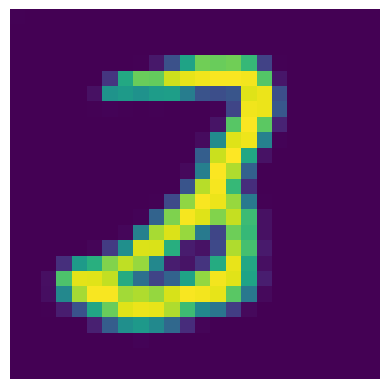

Epoch [411/500], Discriminator Loss: 1.1237, Generator Loss: 0.9567


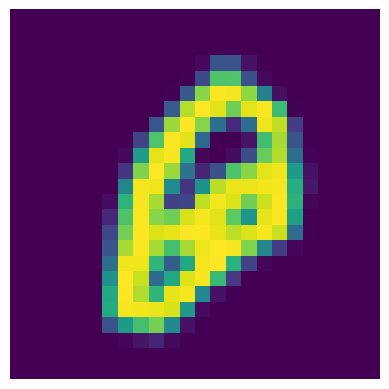

Epoch [416/500], Discriminator Loss: 1.1808, Generator Loss: 1.0379


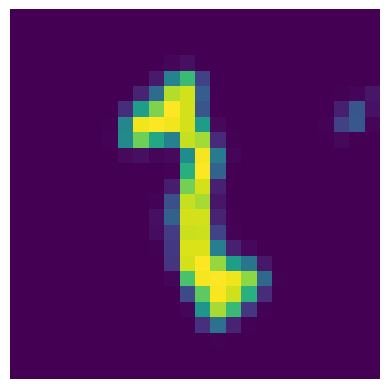

Epoch [421/500], Discriminator Loss: 1.1235, Generator Loss: 1.0480


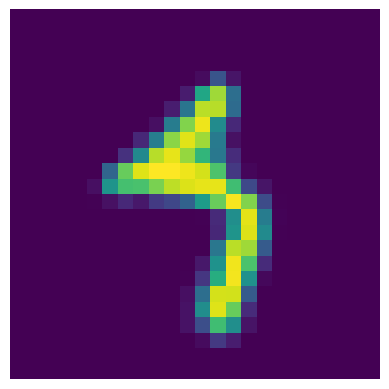

Epoch [426/500], Discriminator Loss: 1.1936, Generator Loss: 0.9009


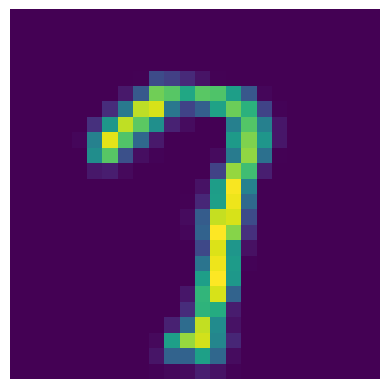

Epoch [431/500], Discriminator Loss: 1.1655, Generator Loss: 0.7771


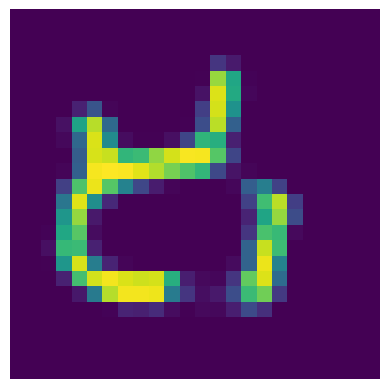

Epoch [436/500], Discriminator Loss: 1.2492, Generator Loss: 0.9635


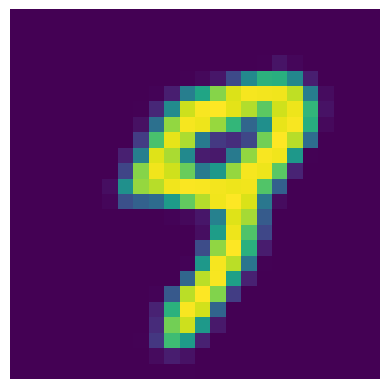

Epoch [441/500], Discriminator Loss: 1.4527, Generator Loss: 1.0063


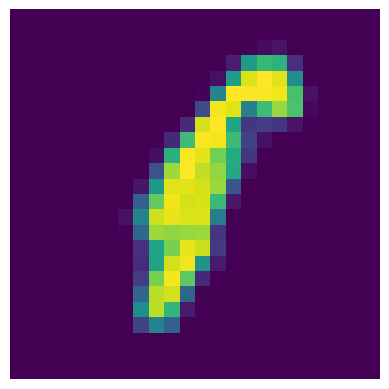

Epoch [446/500], Discriminator Loss: 1.3155, Generator Loss: 0.9305


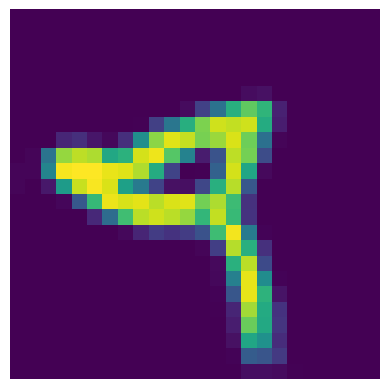

Epoch [451/500], Discriminator Loss: 1.2659, Generator Loss: 0.8599


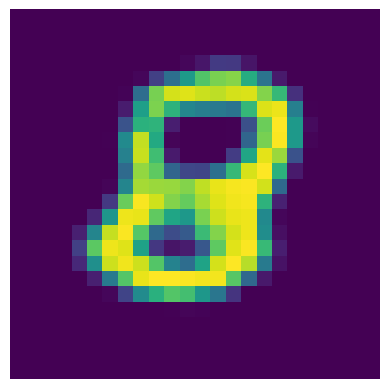

Epoch [456/500], Discriminator Loss: 1.1308, Generator Loss: 0.8054


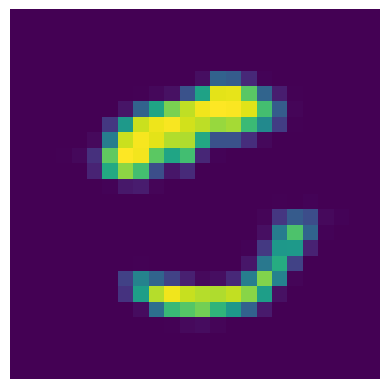

Epoch [461/500], Discriminator Loss: 1.2414, Generator Loss: 0.8934


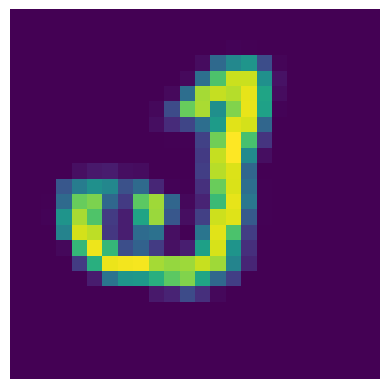

Epoch [466/500], Discriminator Loss: 1.3039, Generator Loss: 0.9201


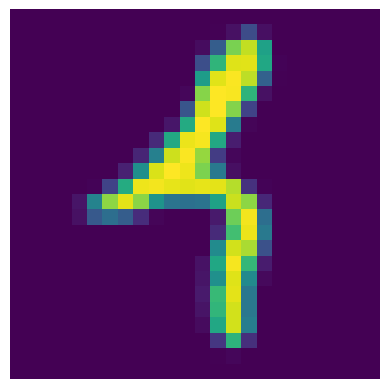

Epoch [471/500], Discriminator Loss: 1.0467, Generator Loss: 0.8216


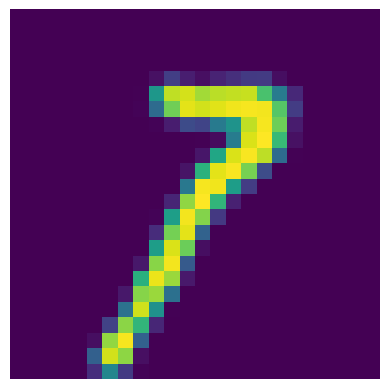

Epoch [476/500], Discriminator Loss: 1.4137, Generator Loss: 0.7551


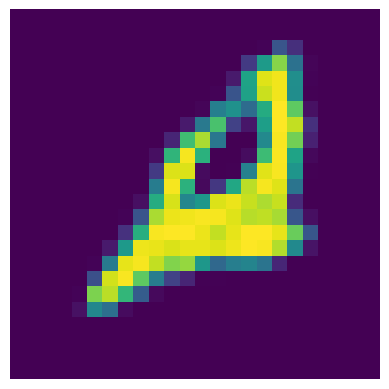

Epoch [481/500], Discriminator Loss: 1.4568, Generator Loss: 0.7645


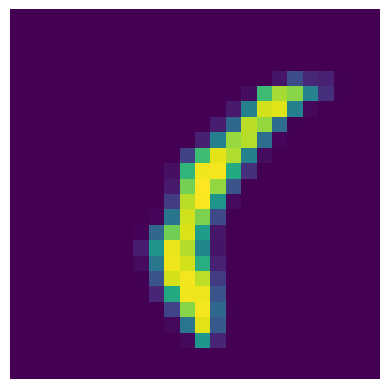

Epoch [486/500], Discriminator Loss: 1.1728, Generator Loss: 0.8754


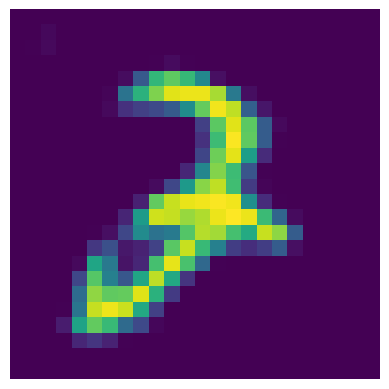

Epoch [491/500], Discriminator Loss: 1.3461, Generator Loss: 0.8806


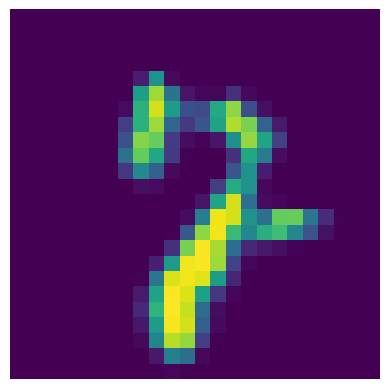

Epoch [496/500], Discriminator Loss: 1.6935, Generator Loss: 0.9748


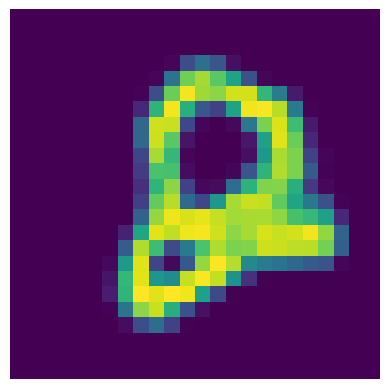

In [ ]:
dis_losses = []
gen_losses = []

for e in range(epochs):

  for i, (data,_) in enumerate(dataloader):
    real_data = data.to(device)
    latent_noise = get_latent_noise(batch_size//2,latent_dim)
    fake_data = generator(latent_noise)

    ##Discriminator Loss and Update
    discriminator_loss = loss_Diss(discriminator,real_data,fake_data)
    discriminator.zero_grad()
    discriminator_loss.backward()
    optimD.step()


    ##Generator Loss
    fake_data_64 = get_latent_noise(batch_size,latent_dim)
    fake_data_64 = generator(fake_data_64)

    ##Generator update
    generator_loss = loss_Gen(discriminator,fake_data_64)
    generator.zero_grad()
    generator_loss.backward()
    optimG.step()

    dis_losses.append(discriminator_loss)
    gen_losses.append(generator_loss)

  if e % 5==0:

    print(f"Epoch [{e+1}/{epochs}], "
          f"Discriminator Loss: {discriminator_loss.item():.4f}, "
          f"Generator Loss: {generator_loss.item():.4f}")

    generator.eval()
    with torch.no_grad():
      generated_sample = generator(get_latent_noise(1,latent_dim))
      reconstructed = generated_sample.detach().cpu().numpy()
      plt.imshow(reconstructed.reshape(24,24,1))
      plt.axis('off')
      plt.show()

    generator.train()
plt.show()

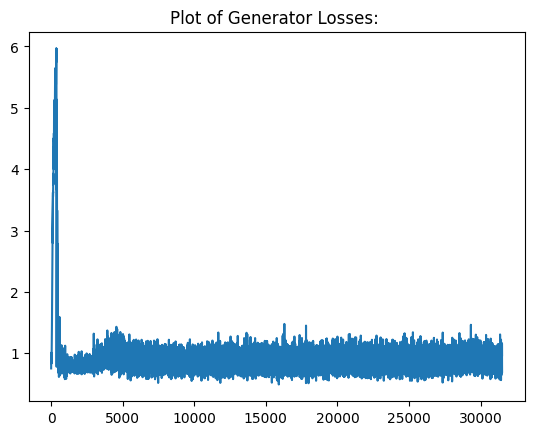

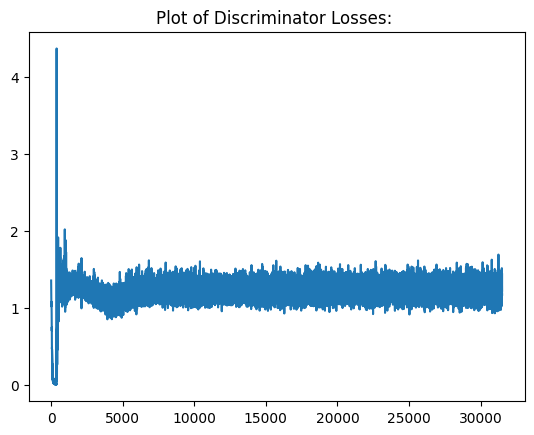

In [ ]:
plt.plot([gen.item() for gen in gen_losses])
plt.title("Plot of Generator Losses: ")
plt.grid(False)


plt.show()

plt.plot([dis.item() for dis in dis_losses])
plt.title("Plot of Discriminator Losses: ")
plt.grid(False)

plt.show()

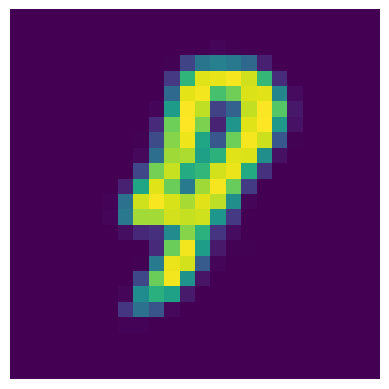

In [ ]:

generator.eval()

with torch.no_grad():
  generated_sample = generator(get_latent_noise(1,latent_dim))
  reconstructed = generated_sample.detach().cpu().numpy()
  plt.imshow(reconstructed.reshape(24,24,1))
  plt.axis('off')
  plt.show()